In [1]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations

%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("C:\Dataset\statsfinal.csv")

In [3]:
data = data.drop(columns=['Unnamed: 0'])

In [4]:
data

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91
1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62
2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85
3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36
4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04
...,...,...,...,...,...,...,...,...,...
4595,30-01-2023,2476,3419,525,1359,7848.92,21676.46,2845.50,9689.67
4596,31-01-2023,7446,841,4825,1311,23603.82,5331.94,26151.50,9347.43
4597,01-02-2023,6289,3143,3588,474,19936.13,19926.62,19446.96,3379.62
4598,02-02-2023,3122,1188,5899,517,9896.74,7531.92,31972.58,3686.21


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4600 non-null   object 
 1   Q-P1    4600 non-null   int64  
 2   Q-P2    4600 non-null   int64  
 3   Q-P3    4600 non-null   int64  
 4   Q-P4    4600 non-null   int64  
 5   S-P1    4600 non-null   float64
 6   S-P2    4600 non-null   float64
 7   S-P3    4600 non-null   float64
 8   S-P4    4600 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 323.6+ KB


In [6]:
data['Day'] = data['Date'].apply(lambda x: x.split('-')[0])
data['Month'] = data['Date'].apply(lambda x: x.split('-')[1])
data['Year'] = data['Date'].apply(lambda x: x.split('-')[2])
data

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Day,Month,Year
0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91,13,06,2010
1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62,14,06,2010
2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85,15,06,2010
3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36,16,06,2010
4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04,17,06,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,30-01-2023,2476,3419,525,1359,7848.92,21676.46,2845.50,9689.67,30,01,2023
4596,31-01-2023,7446,841,4825,1311,23603.82,5331.94,26151.50,9347.43,31,01,2023
4597,01-02-2023,6289,3143,3588,474,19936.13,19926.62,19446.96,3379.62,01,02,2023
4598,02-02-2023,3122,1188,5899,517,9896.74,7531.92,31972.58,3686.21,02,02,2023


In [7]:
data_reduced = data.query("Year != '2010' and Year != '2023'")
#Create a function that allows us to plot a bar chart for the 4 products
def plot_bar_chart(df, columns, stri, str1, val):
    # Aggregate sales for each product by year, by sum or mean
    if val == 'sum':
        sales_by_year = df.groupby('Year')[columns].sum().reset_index()
    elif val == 'mean':
        sales_by_year = df.groupby('Year')[columns].mean().reset_index()

    # Melt the data to make it easier to plot
    sales_by_year_melted = pd.melt(sales_by_year, id_vars='Year', value_vars=columns, var_name='Product', value_name='Sales')

    # Create a bar chart
    plt.figure(figsize=(20,4))
    sns.barplot(data=sales_by_year_melted, x='Year', y='Sales', hue='Product') #,palette="cividis")
    plt.xlabel('Year')
    plt.ylabel(stri)
    plt.title(f'{stri} by {str1}')
    plt.xticks(rotation=45)
    plt.show()

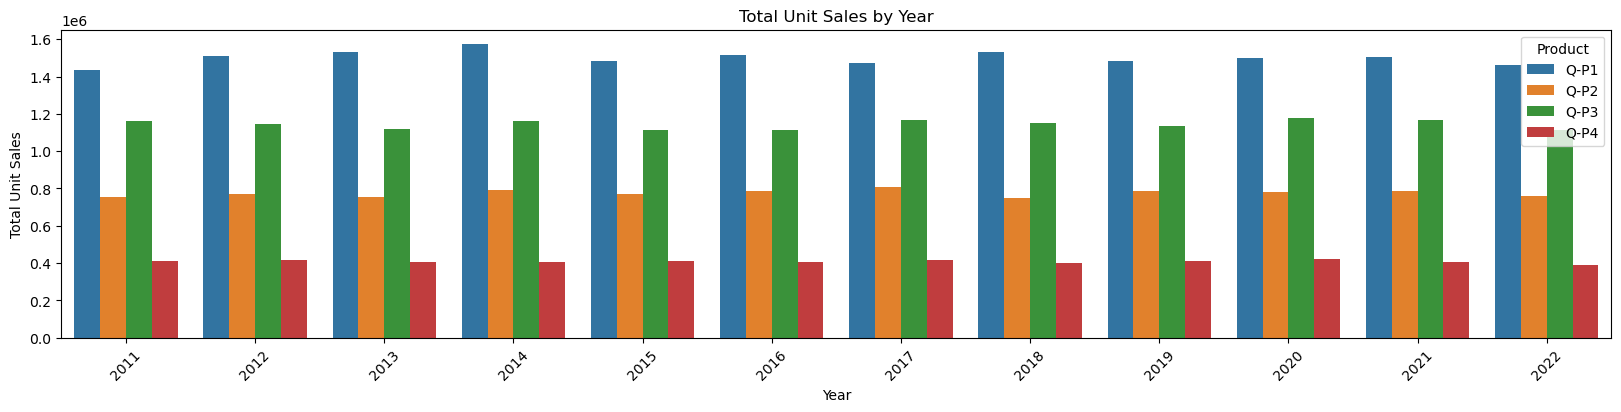

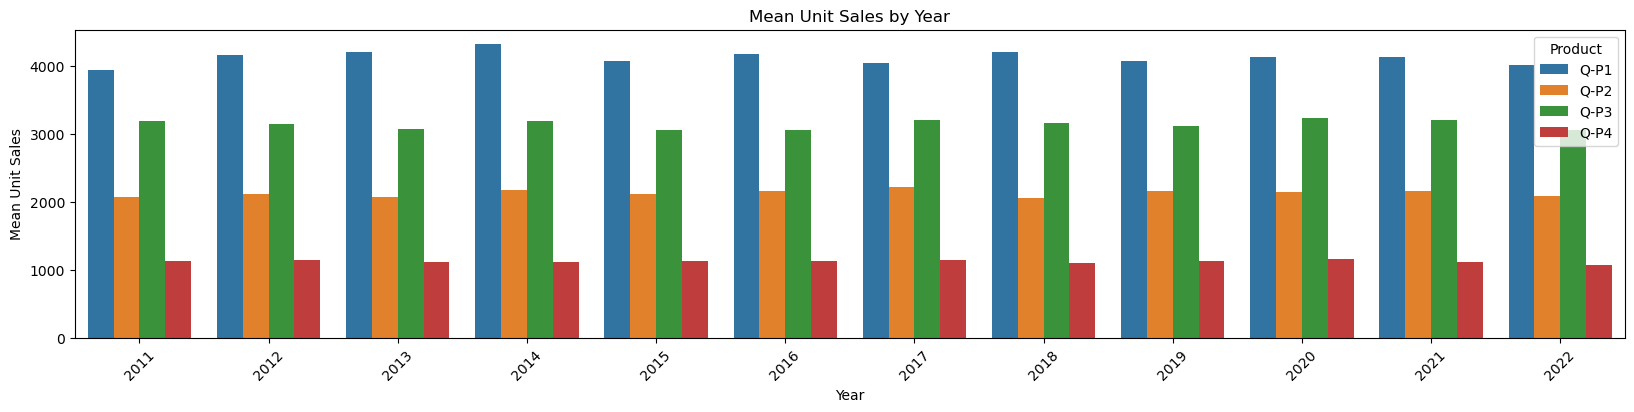

In [8]:
plot_bar_chart(data_reduced, ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4'],'Total Unit Sales', 'Year', 'sum')

plot_bar_chart(data_reduced, ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4'],'Mean Unit Sales', 'Year', 'mean')

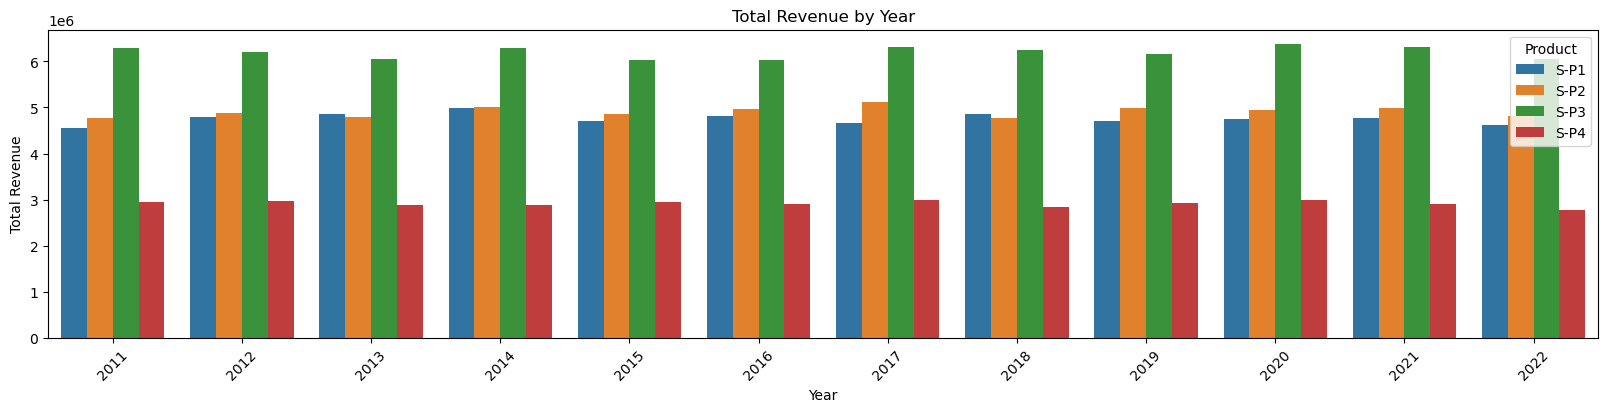

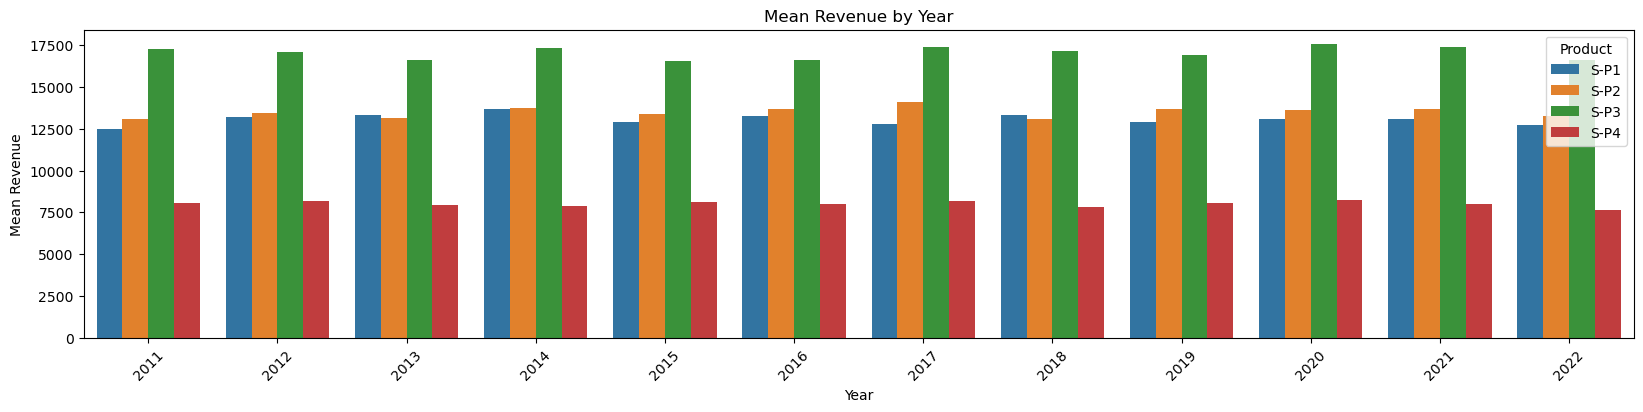

In [9]:
plot_bar_chart(data_reduced, ['S-P1', 'S-P2', 'S-P3', 'S-P4'], 'Total Revenue', 'Year', 'sum')

plot_bar_chart(data_reduced, ['S-P1', 'S-P2', 'S-P3', 'S-P4'], 'Mean Revenue', 'Year', 'mean')


In [16]:
print(data)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

            Date  Q-P1  Q-P2  Q-P3  Q-P4      S-P1      S-P2      S-P3  \
0     13-06-2010  5422  3725   576   907  17187.74  23616.50   3121.92   
1     14-06-2010  7047   779  3578  1574  22338.99   4938.86  19392.76   
2     15-06-2010  1572  2082   595  1145   4983.24  13199.88   3224.90   
3     16-06-2010  5657  2399  3140  1672  17932.69  15209.66  17018.80   
4     17-06-2010  3668  3207  2184   708  11627.56  20332.38  11837.28   
...          ...   ...   ...   ...   ...       ...       ...       ...   
4595  30-01-2023  2476  3419   525  1359   7848.92  21676.46   2845.50   
4596  31-01-2023  7446   841  4825  1311  23603.82   5331.94  26151.50   
4597  01-02-2023  6289  3143  3588   474  19936.13  19926.62  19446.96   
4598  02-02-2023  3122  1188  5899   517   9896.74   7531.92  31972.58   
4599  03-02-2023  1234  3854  2321   406   3911.78  24434.36  12579.82   

          S-P4 Day Month  Year  
0      6466.91  13    06  2010  
1     11222.62  14    06  2010  
2      8163.

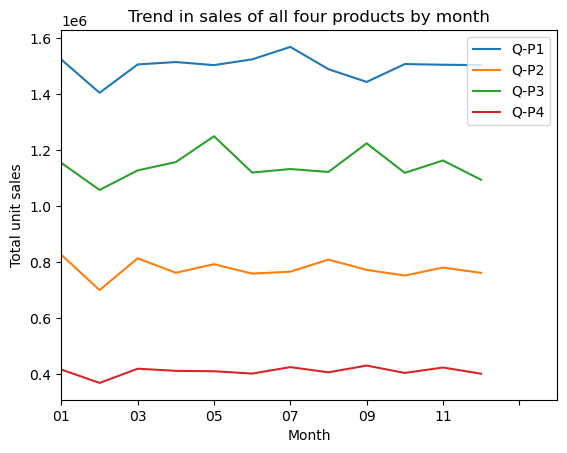

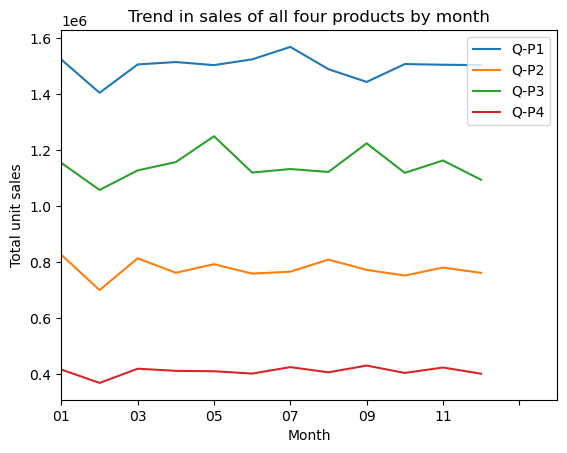

,count,mean,std,min,25%,50%,75%,max
Q-P1,4600.0,4121.849130,2244.271323,254.00,2150.500,4137.000,6072.000,7998.00
Q-P2,4600.0,2130.281522,1089.783705,251.00,1167.750,2134.000,3070.250,3998.00
Q-P3,4600.0,3145.740000,1671.832231,250.00,1695.750,3202.500,4569.000,6000.00
Q-P4,4600.0,1123.500000,497.385676,250.00,696.000,1136.500,1544.000,2000.00
S-P1,4600.0,13066.261743,7114.340094,805.18,6817.085,13114.290,19248.240,25353.66
S-P2,4600.0,13505.984848,6909.228687,1591.34,7403.535,13529.560,19465.385,25347.32
S-P3,4600.0,17049.910800,9061.330694,1355.00,9190.965,17357.550,24763.980,32520.00
S-P4,4600.0,8010.555000,3546.359869,1782.50,4962.480,8103.245,11008.720,14260.00


In [17]:
# Create a figure and axis
def month_plot():
    fig, ax = plt.subplots()

    # Plot the sales data for each product by month
    data_reduced.groupby('Month')[['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']].sum().plot(ax=ax)

    # Set the x-axis limits to only show up to December
    ax.set_xlim(left=0, right=13)

    # Set the axis labels and title
    ax.set_xlabel('Month')
    ax.set_ylabel('Total unit sales')
    ax.set_title('Trend in sales of all four products by month')

    plt.show()

month_plot()
data_reduced['Month'] = data['Month'].replace('9', '09')
month_plot()
data.describe().T

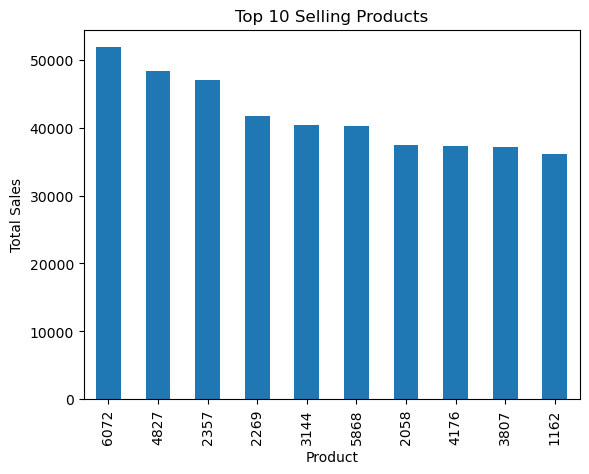

In [24]:
top_selling_products = data.groupby('Q-P1')['S-P4'].sum().sort_values(ascending=False)
 # Visualize the top-selling products
top_selling_products.head(10).plot(kind='bar')
plt.title('Top 10 Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

Q-P1    18960506
Q-P2     9799295
Q-P3    14470404
Q-P4     5168100
dtype: int64


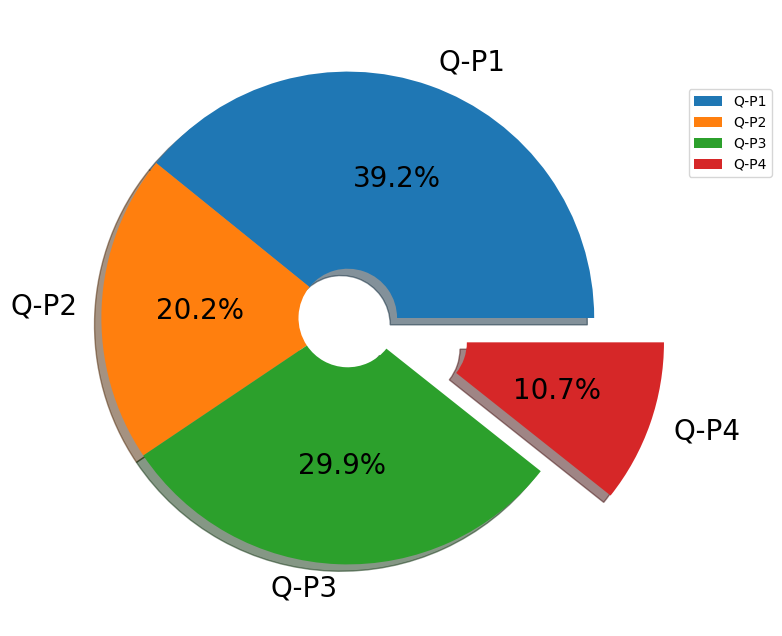

In [28]:
 q = data[["Q-P1","Q-P2","Q-P3","Q-P4"]].sum()
 print(q)
 plt.figure(figsize=(8,8))
 plt.pie(q,labels=data[["Q-P1","Q-P2","Q-P3","Q-P4"]].sum().
 index,shadow=True,autopct="%0.01f%%",textprops={"fontsize":
 20},wedgeprops={'width': 0.8},explode=[0,0,0,0.3])
 plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.8));

In [30]:
data['Day'] = data['Date'].apply(lambda x: x.split('-')[0])
data['Month'] = data['Date'].apply(lambda x: x.split('-')[1])
data['Year'] = data['Date'].apply(lambda x: x.split('-')[2])
data

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Day,Month,Year
0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91,13,06,2010
1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62,14,06,2010
2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85,15,06,2010
3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36,16,06,2010
4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04,17,06,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,30-01-2023,2476,3419,525,1359,7848.92,21676.46,2845.50,9689.67,30,01,2023
4596,31-01-2023,7446,841,4825,1311,23603.82,5331.94,26151.50,9347.43,31,01,2023
4597,01-02-2023,6289,3143,3588,474,19936.13,19926.62,19446.96,3379.62,01,02,2023
4598,02-02-2023,3122,1188,5899,517,9896.74,7531.92,31972.58,3686.21,02,02,2023


In [31]:
def month_31_data(df, months):
    m31_data = df[df['Month'].isin(months) & (df['Day'] == '31')]
    return m31_data
_31_months = month_31_data(data_reduced, ['01', '02', '03', '04', '05', '06','07', '08', '09', '10', '11', '12'])
_31_months

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Day,Month,Year
231,31-01-2011,939,3325,1863,1612,2976.63,21080.50,10097.46,11493.56,31,01,2011
290,31-03-2011,464,2220,421,1663,1470.88,14074.80,2281.82,11857.19,31,03,2011
351,31-05-2011,1507,2980,3816,1202,4777.19,18893.20,20682.72,8570.26,31,05,2011
412,31-07-2011,4336,744,4717,667,13745.12,4716.96,25566.14,4755.71,31,07,2011
442,31-08-2011,4548,1484,1596,1974,14417.16,9408.56,8650.32,14074.62,31,08,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
4352,31-05-2022,3669,2710,3067,1593,11630.73,17181.40,16623.14,11358.09,31,05,2022
4413,31-07-2022,1437,833,1867,1270,4555.29,5281.22,10119.14,9055.10,31,07,2022
4443,31-08-2022,1035,1639,3658,841,3280.95,10391.26,19826.36,5996.33,31,08,2022
4474,31-9-2022,6964,1873,5481,1336,22075.88,11874.82,29707.02,9525.68,31,09,2022


In [ ]:
 for i in data.columns:
        print(i,"---------",data[i].unique())
        
discrete_columns = ['Q-P1','Q-P2','Q-P3','Q-P4']
for column in discrete_columns:
    data[column].value_counts().plot.bar()
    plt.show()

Q-P1    18960506
Q-P2     9799295
Q-P3    14470404
Q-P4     5168100
dtype: int64


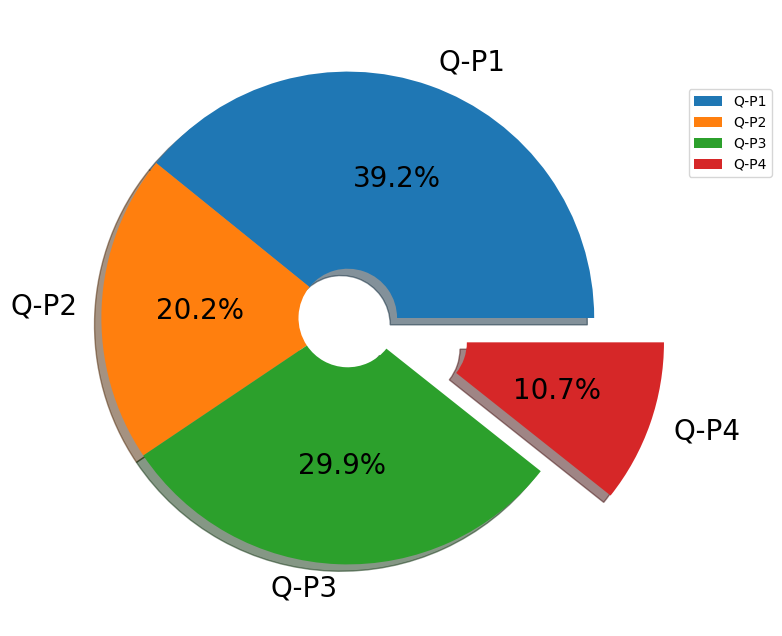

In [34]:
# Total unit sales Product 1, Product 2, Product 3, Product 4
q = data[["Q-P1","Q-P2","Q-P3","Q-P4"]].sum()
print(q)
plt.figure(figsize=(8,8))
plt.pie(q,labels=data[["Q-P1","Q-P2","Q-P3","Q-P4"]].sum().index,shadow=True,autopct="%0.01f%%",textprops={"fontsize":20},wedgeprops={'width': 0.8},explode=[0,0,0,0.3])
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.8));

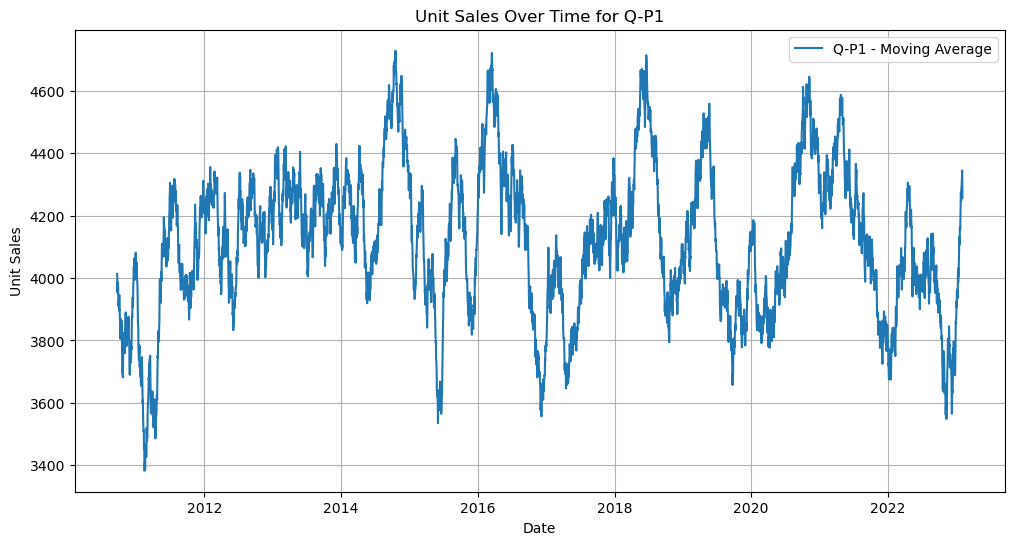

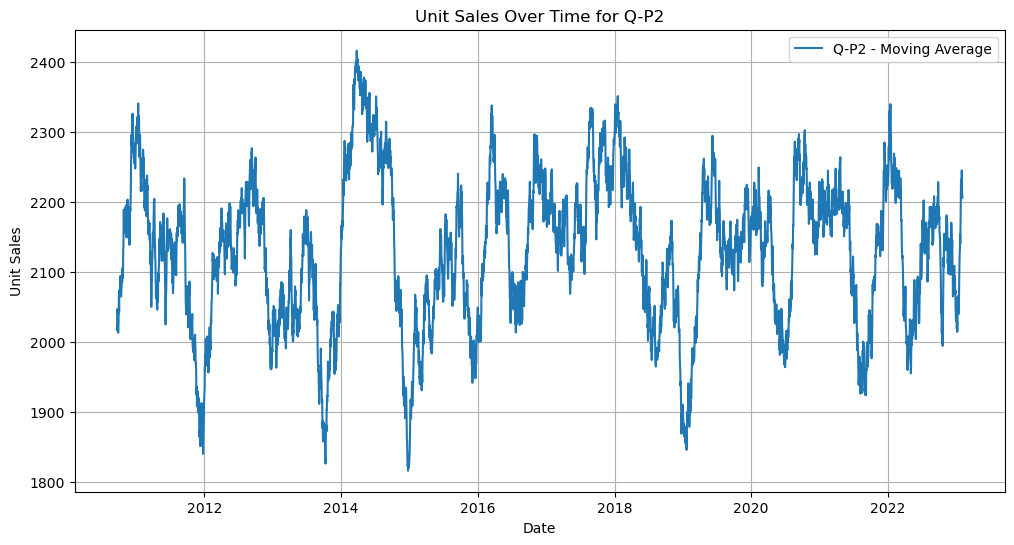

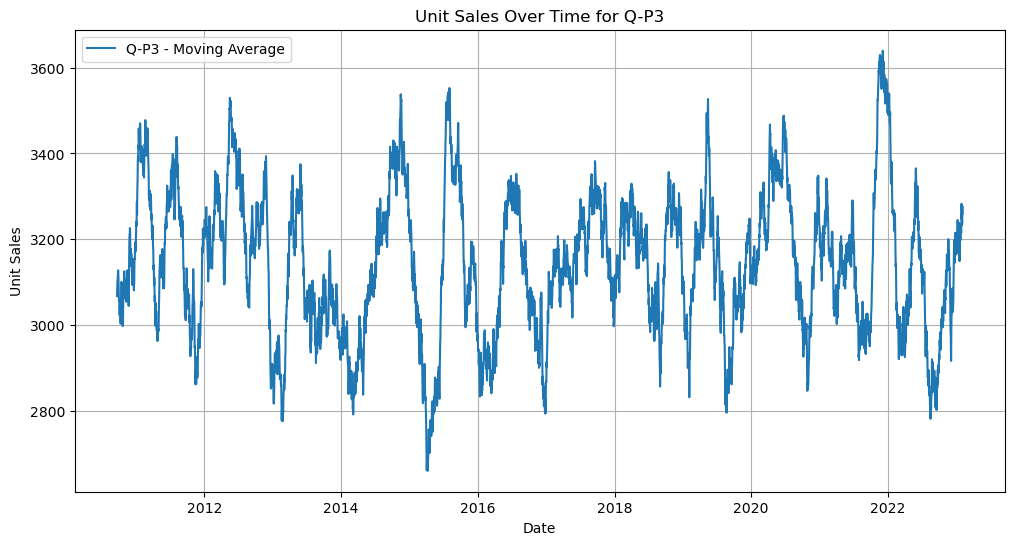

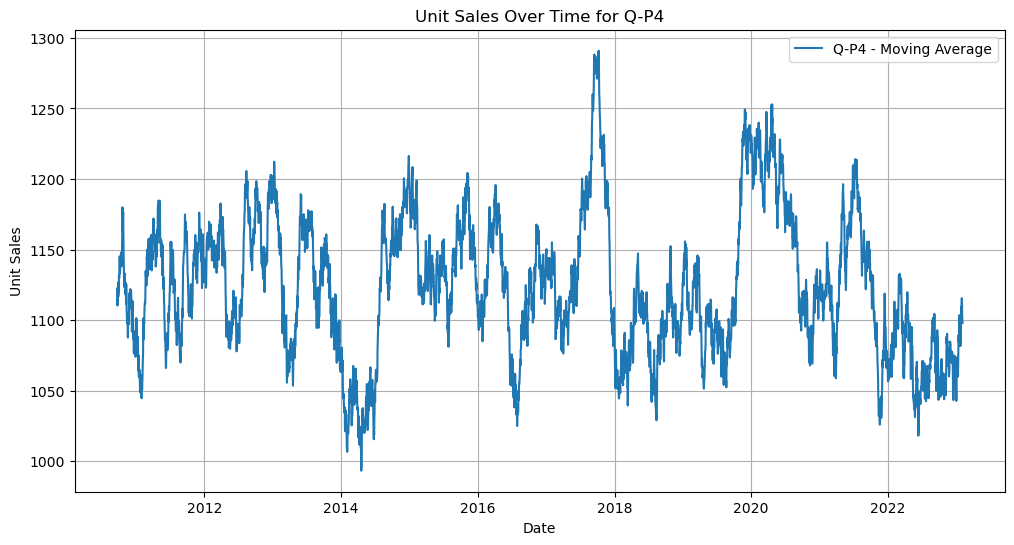

In [42]:
df= data
try:
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
except pd.errors.ParserError:
    pass

df = df.dropna(subset=['Date'])
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)
products = ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']  

for product in products:
    product_data = df[product]

    moving_average = product_data.rolling(window=100).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(df.index, moving_average, label=f'{product} - Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Unit Sales')
    plt.title(f'Unit Sales Over Time for {product}')
    plt.grid(True)
    plt.legend()
    plt.show()
    

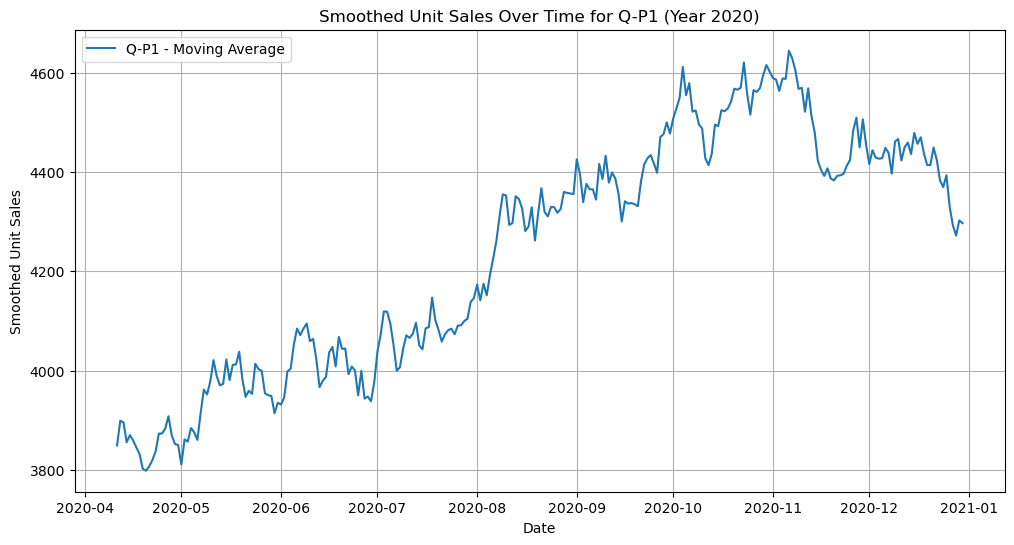

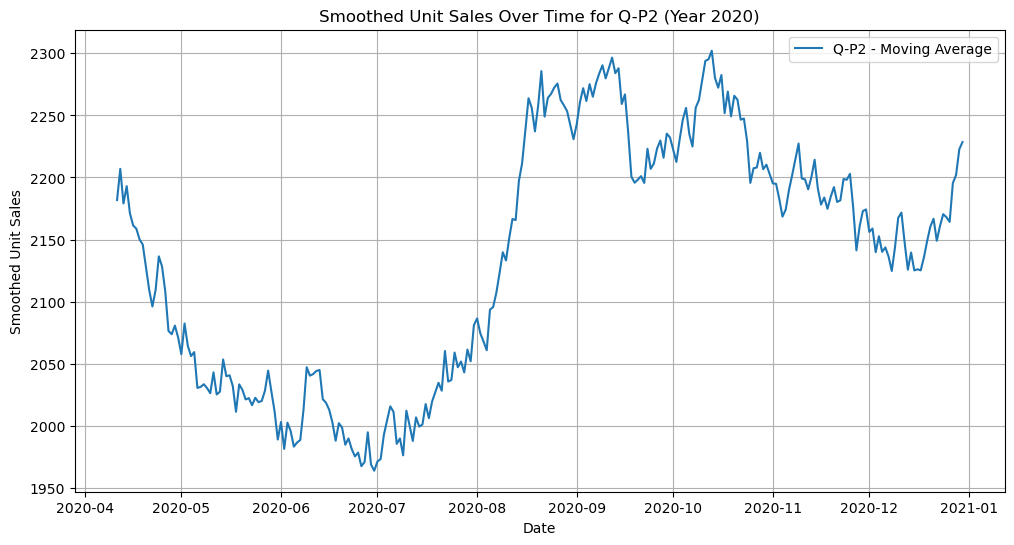

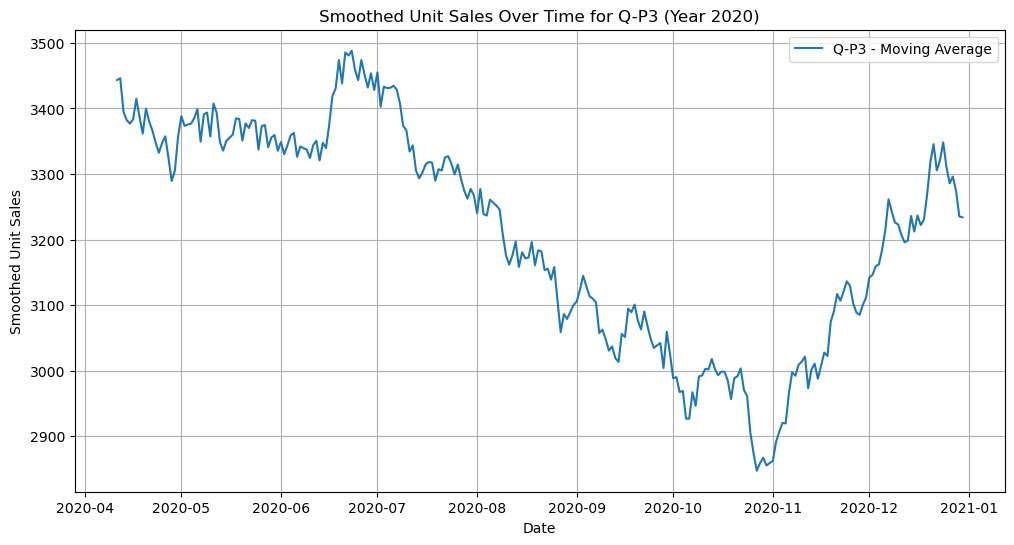

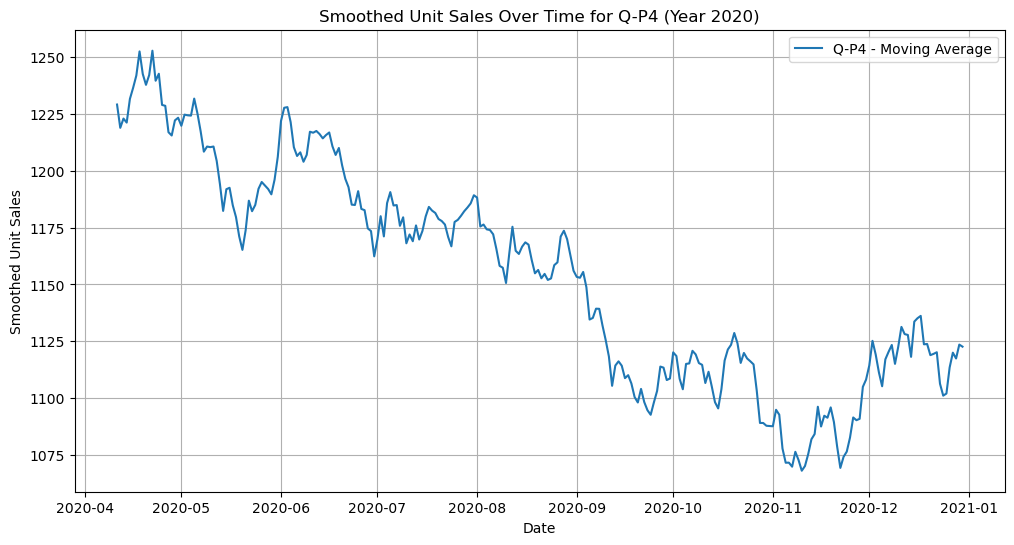

In [44]:
df = data
try:
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
except pd.errors.ParserError:
    pass

df = df.dropna(subset=['Date'])
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)
products = ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']
for product in products:
    product_data = df[product]['2020']

    moving_average = product_data.rolling(window=100).mean()

    # Create a clearer plot of the smoothed data
    plt.figure(figsize=(12, 6))
    plt.plot(product_data.index, moving_average, label=f'{product} - Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Smoothed Unit Sales')
    plt.title(f'Smoothed Unit Sales Over Time for {product} (Year 2020)')
    plt.grid(True)
    plt.legend()
    plt.show()

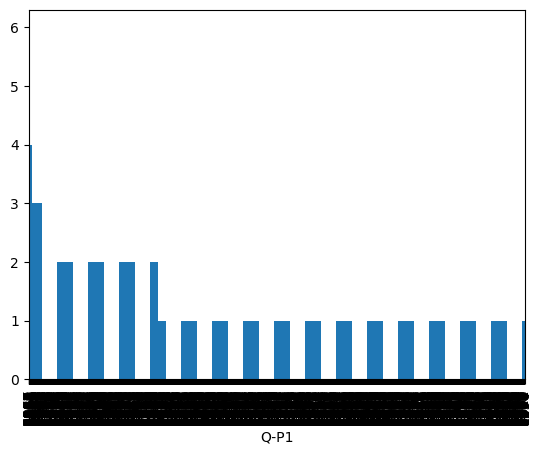

In [ ]:
discrete_columns = ['Q-P1','Q-P2','Q-P3','Q-P4']
for column in discrete_columns:
    data[column].value_counts().plot.bar()
    plt.show()

In [ ]:
continuous_columns = ['S-P1', 'S-P2', 'S-P3', 'S-P4']
continuous_data_df = product_sales_df[continuous_columns]
continuous_data_df.head(5)

In [ ]:
continuous_data_df.describe()